In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


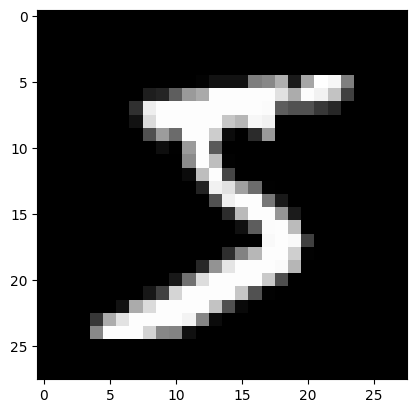

In [5]:
plt.imshow(x_train[0], cmap = 'gray') # check data

In [9]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# train model with training data over 10 epochs
train_model = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9567 - loss: 0.1467 - val_accuracy: 0.9550 - val_loss: 0.1558
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9538 - loss: 0.1505 - val_accuracy: 0.9477 - val_loss: 0.1778
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9564 - loss: 0.1443 - val_accuracy: 0.9522 - val_loss: 0.1647
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9587 - loss: 0.1380 - val_accuracy: 0.9555 - val_loss: 0.1539
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9587 - loss: 0.1376 - val_accuracy: 0.9527 - val_loss: 0.1533
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9607 - loss: 0.1304 - val_accuracy: 0.9535 - val_loss: 0.1647
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9607 - loss: 0.1308 - val_accuracy: 0.9545 - val_loss: 0.1526
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9611 - loss: 0.1280 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


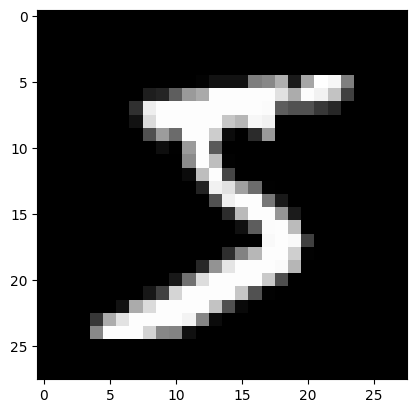

Prediction:  5


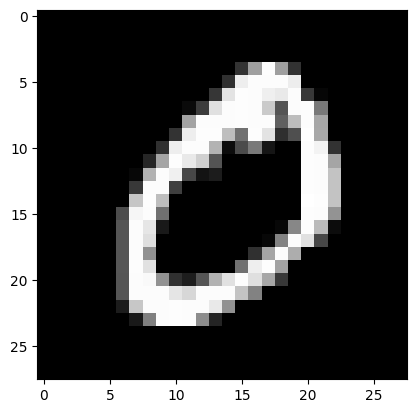

Prediction:  0


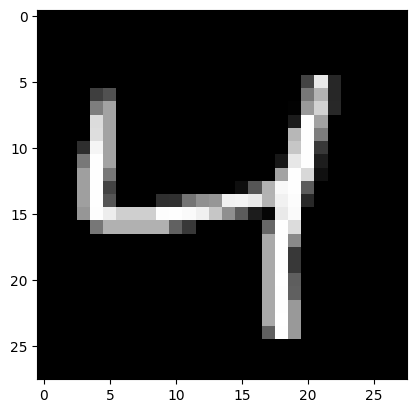

Prediction:  4


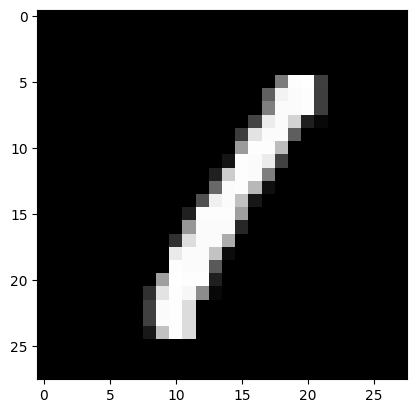

Prediction:  1


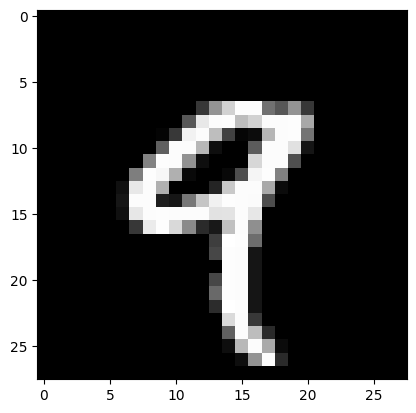

Prediction:  9


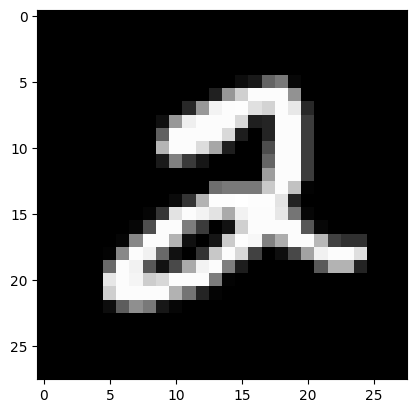

Prediction:  2


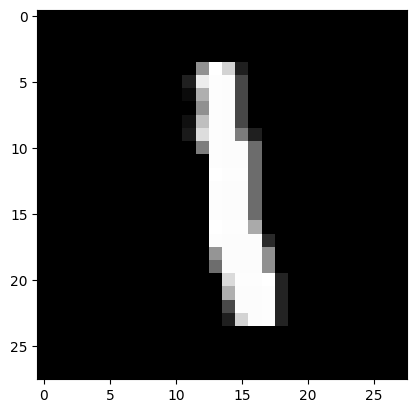

Prediction:  1


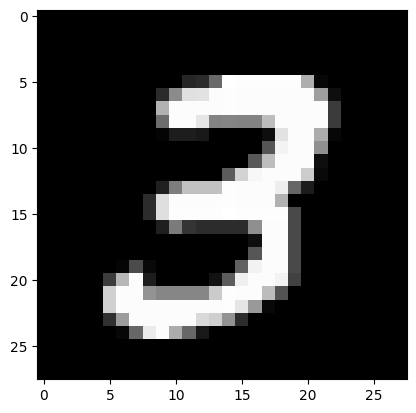

Prediction:  3


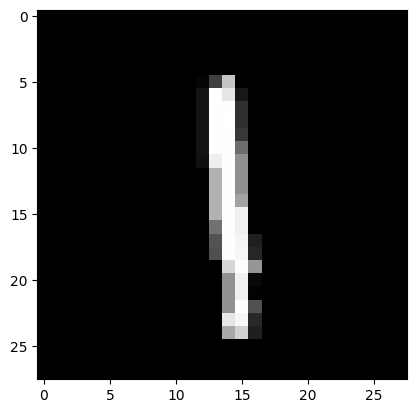

Prediction:  1


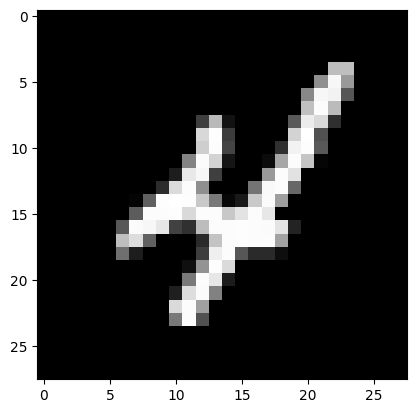

Prediction:  4


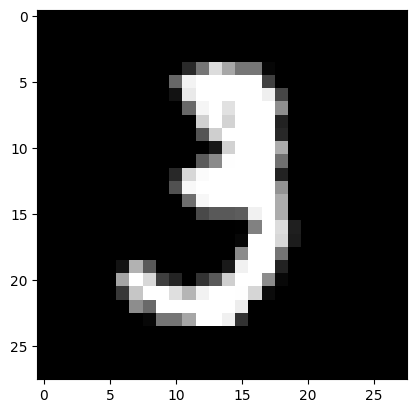

Prediction:  3


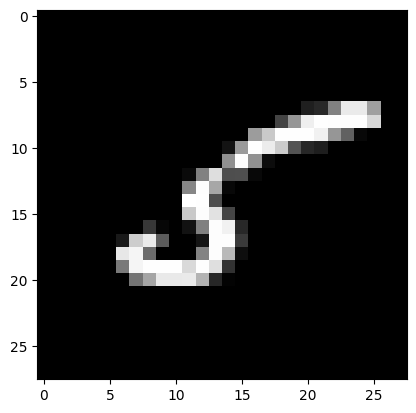

Prediction:  5


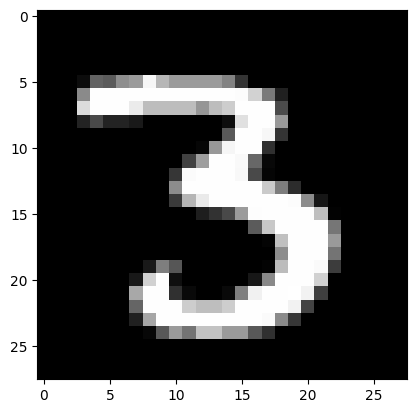

Prediction:  3


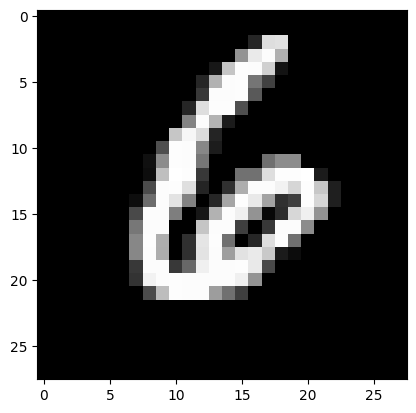

Prediction:  6


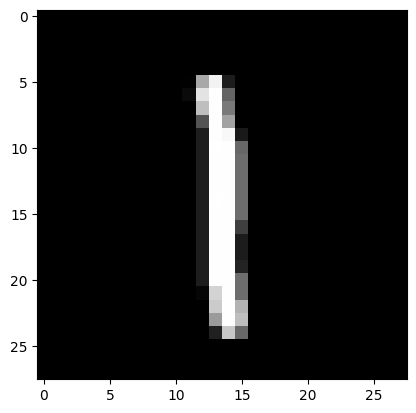

Prediction:  1


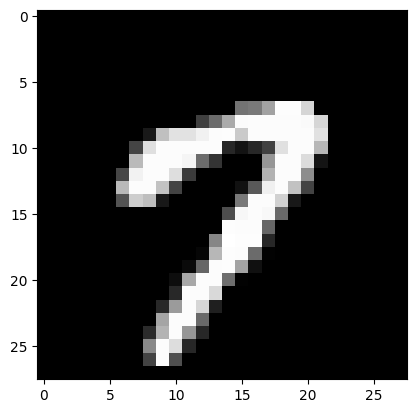

Prediction:  7


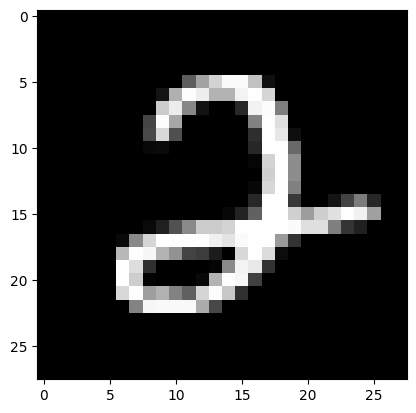

Prediction:  2


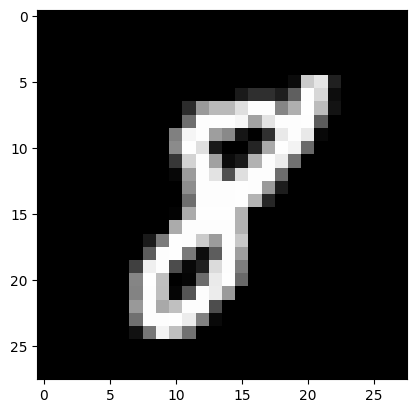

Prediction:  8


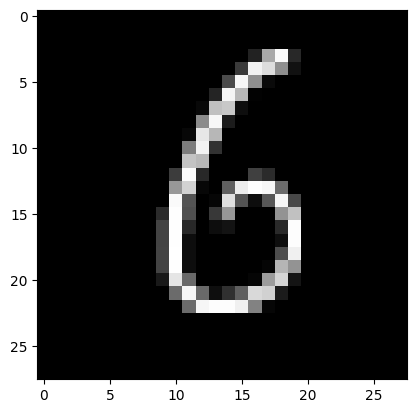

Prediction:  6


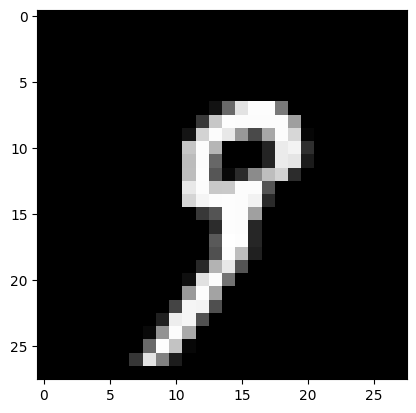

Prediction:  9


In [15]:
number_of_images = 20

probabilities = model.predict(x_train[:number_of_images])
predictions = np.argmax(probabilities, axis=1)
for index in range(len(probabilities)):
  plt.imshow(x_train[index], cmap='gray')
  plt.show()
  print("Prediction: ", predictions[index])

In [16]:
# incorrect predictions
number_of_incorrect = 0

for index in range(len(probabilities)):
  predict = predictions[index]
  actual = y_train[index]
  if predictions[index] != y_train[index]:
    plt.imshow(x_train[index], cmap='gray')
    plt.show()
    print("Incorrect Prediction: ", predictions[index])
    number_of_incorrect += 1
print(number_of_incorrect, 'incorrect predictions')

0 incorrect predictions
